In [2]:
import pandas as pd

In [9]:
df=pd.read_csv("insurance.csv")
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [25]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse_output=False)

cat_cols_name_list=df.select_dtypes(include='object').columns.tolist()
cat_cols_df=df[cat_cols_name_list]
print(type(df['charges'].dtype))
num_cols_name_list=df.select_dtypes(include=['int','float']).columns.tolist()
print(num_cols_name_list)
num_cols_df=df[num_cols_name_list]

cat_cols_array=ohe.fit_transform(cat_cols_df)
cat_encoded_df=pd.DataFrame(cat_cols_array,columns=ohe.get_feature_names_out(cat_cols_df.columns))
                            
final_df=pd.concat([cat_encoded_df,num_cols_df],axis=1)
final_df.index=df.index
print(final_df.head())
print(final_df.columns)



<class 'numpy.dtypes.Float64DType'>
['age', 'bmi', 'children', 'charges']
   sex_female  sex_male  smoker_no  smoker_yes  region_northeast  \
0         1.0       0.0        0.0         1.0               0.0   
1         0.0       1.0        1.0         0.0               0.0   
2         0.0       1.0        1.0         0.0               0.0   
3         0.0       1.0        1.0         0.0               0.0   
4         0.0       1.0        1.0         0.0               0.0   

   region_northwest  region_southeast  region_southwest  age     bmi  \
0               0.0               0.0               1.0   19  27.900   
1               0.0               1.0               0.0   18  33.770   
2               0.0               1.0               0.0   28  33.000   
3               1.0               0.0               0.0   33  22.705   
4               1.0               0.0               0.0   32  28.880   

   children      charges  
0         0  16884.92400  
1         1   1725.55230  
2  

In [26]:
X=final_df.drop(columns=['charges'])
y=final_df['charges']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [30]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [31]:
y_pred=model.predict(X_test)
y_pred

array([ 9470.3140151 ,  5353.9347411 , 28333.1926215 , 10599.1967226 ,
       34495.3665406 ,  9340.7276695 ,  2052.5600545 , 14159.8941465 ,
        6347.4746805 , 11073.6033654 , 20026.0908788 ,  7007.122938  ,
        5520.4904204 , 45754.9075678 , 48463.8398747 , 45177.8214659 ,
        9690.4731786 , 43158.7507929 ,  8802.9564957 , 23815.1732873 ,
        5602.8433906 ,  8930.8945911 ,  1523.6676926 ,  2976.5045976 ,
       11862.2059752 , 11738.6827018 , 13622.2499563 ,  6011.713135  ,
       10334.0579339 ,  4776.53090363,  7722.7312145 , 11748.9377415 ,
        3521.5132882 ,  6058.5520249 ,  3345.0542524 , 11642.2020254 ,
        3029.0800765 ,  8241.1885093 , 23752.227305  , 39392.5110059 ,
        5427.4041715 ,  3703.8046221 , 12556.3831445 , 14676.8991647 ,
        6524.616648  , 15340.8543033 , 21455.061531  ,  5432.200607  ,
       41875.9190681 ,  6205.1963047 , 14246.9557062 ,  2220.8307075 ,
        6930.8973079 ,  1745.7105245 , 13650.0000882 , 10886.6461205 ,
      

In [32]:
from sklearn.metrics import r2_score,root_mean_squared_error
score=r2_score(y_test,y_pred)
rmse=root_mean_squared_error(y_test,y_pred)

print("Accuracy:",score)
print("Rmse:",rmse)

Accuracy: 0.8674834716148643
Rmse: 4535.74943460129


In [33]:
print(df['charges'].mean()) 

13270.422265141257


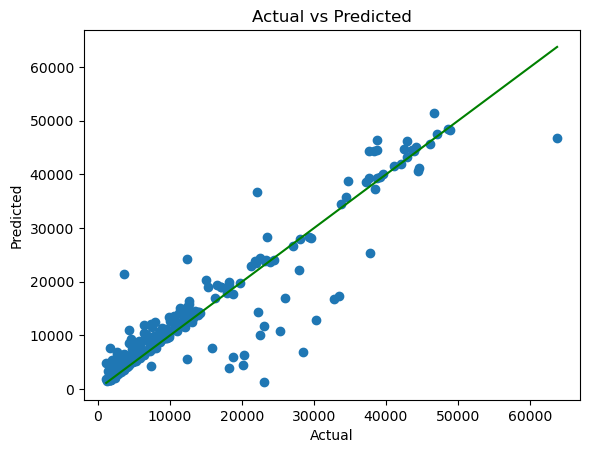

In [38]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color='green')
plt.title("Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [40]:
import joblib

# Assuming 'model' is your trained model
joblib.dump(model, "RandomForest.model.pkl")

['RandomForest.model.pkl']